On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* What metric would you report for this dataset?
* What is its value?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df['order_amount'].mean()

3145.128

## 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
Here introduces the problem! In this case, the AOV is actually calculating the average value for the `order_amount`, but disregarding the item number within the order. AOV value could be largely influenced by the value of `total_items`. For instance, multiple orders with 100 or more items will result in a higher AOV, but that does not necessarily imply that sneakers are not affordable. 

mean_value =  387.7428
median_value =  153.0
max_value =  25725.0
min_value =  90.0
number of extreme case =  46 and percentage of extreme case =  0.9199999999999999


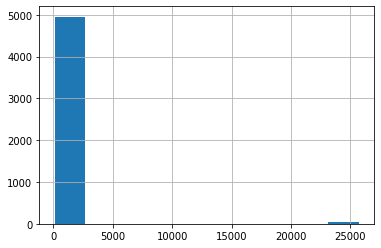

In [56]:
df['new_aov']=df['order_amount']/df['total_items']
mean_value = df['new_aov'].mean()
median_value = df['new_aov'].median()
max_value = df['new_aov'].max()
min_value = df['new_aov'].min()
print("mean_value = ", mean_value)
print("median_value = ", median_value)
print("max_value = ", max_value)
print("min_value = ", min_value)
df['new_aov'].hist()
outlier = df.query('new_aov >= 1000')
print('number of extreme case = ', len(outlier), 'and percentage of extreme case = ', (len(outlier)/len(df['new_aov'])*100.0))

For a better understanding of the price of sneakers, we can calculate the average value of "the average amount per order", or we can refer to it as the average price per pair. As a result, the average value seems more appropriate for a sneakers shop, however, the maximum amount for each order is 25725.0, which is very high for a pair of sneakers. Here are two possible explanations:

* There may have been an error when collecting the data, which means we should remove those extremely large values. 
* It is possible to find some extreme rare designer collections or collaborations with luxury brands with prices exceeding 20000 dollars. However, these examples should still be regarded as outliers. 

There are 46 cases with an average price exceeding 1000 dollars, which is equal to 0.92% among all the orders. We should remove those outlier and recalculate the average price for a pair of sneakers. 

In [60]:
df_filtered = df.query('new_aov <= 1000')
print("mean_value = ", df_filtered['new_aov'].mean())
print("median_value = ", df_filtered['new_aov'].median())

mean_value =  152.47557529269278
median_value =  153.0


It seems like we have a reasonable mean value equal to 152.4 and it is close to the median value. Yet, we also notice that we indeed remove those high price outlier 

In [62]:
df_filtered.sort_values('order_amount', ascending=False)[:25]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_aov
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0


There appears to be a reasonable mean value of 152.4 and it is close to the median value. Nevertheless, we also notice that we have indeed removed those outliers with extremely high prices, but some orders contain large item numbers that could be due to duplication introduced by system errors. All of these orders are from the same shop and it is rare for a sneaker shop to offer more than ten thousand pairs of the same model of shoe. Therefore, we also decided to remove these cases.  

In [59]:
df_filtered = df_filtered[df_filtered['total_items'] != 2000]
print("mean_value = ", df_filtered['new_aov'].mean())
print("median_value = ", df_filtered['new_aov'].median())

mean_value =  151.7885355479036
median_value =  153.0


## 2. What metric would you report for this dataset?

The `new_aov` with outliers removed will be reported as the key metric along with the `order_id`, `order_amount`, and `total_items` to assist managers or other analysts who wish to continue tracking or evaluating the results. 

## 3 What is its value?
The final results show a mean value of `new_aov` is 151.78 and median value of `new_aov` is 153. Both are reasonable price for sneakers. 